# Stress Level Analysis: Random Forest Classification

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# Load dataset
df = pd.read_csv("/Users/macuser/Documents/ITCS3162/StressLevelDataset.csv")

## Pre-processing

### Data Explanation:
### Anxiety : range from 0 to 21, Measure : GAD-7
#### 0–4: minimal anxiety
#### 5–9: mild anxiety
#### 10–14: moderate anxiety
#### 15–21: severe anxiety 
##### https://adaa.org/sites/default/files/GAD-7_Anxiety-updated_0.pdf
### Self-esteem : range 0 to 30, Measure: Rosenberg Self Esteem Scale
#### 15-25 are within normal range; scores below 15 suggest low self-esteem; over 25 high self-esteem
##### https://www.sralab.org/rehabilitation-measures/rosenberg-self-esteem-scale#:~:text=The%20RSES%20is%20commonly%20scored,strongly%20agree%20to%20strongly%20disagree.&text=The%20scale%20ranges%20from%200,Other%20scoring%20options%20are%20possible. 
### Mental Health History : 0 if no mental health history, 1 if mental health history
### Depression : range 0 to 27, Measure: Patient Health Questionnaire (PHQ-9)
#### 0 suggests no depression
#### 1-4 suggests minimal depression
#### 5-9 suggests mild depression
#### 10-14 suggests moderate depression
#### 15-19 suggests moderately severe depression
#### 20-27 suggests severe depression
##### https://med.stanford.edu/fastlab/research/imapp/msrs/_jcr_content/main/accordion/accordion_content3/download_256324296/file.res/PHQ9%20id%20date%2008.03.pdf
### Blood pressure: range 1 to 3 (1 is low, 2 is normal, 3 is high. 1 and 3 are bad/unhealthy)
### Living Conditions: material aspects of living conditions, Measure: Living Conditions Rating Scale (LCRS)
#### 0-1 suggest poor living conditions
#### 2-3 suggest good living conditions
#### 4-5 suggest very good living conditions
### Stress level: range 0 to 2 (0 low level/absent, 1 medium level, 2 high level)
### Other features mostly range from 0 to 5 considering 0,1 to be low, 2,3 to be mid, and 4,5 to be high.
#### *depending on the variable, a higher score or a lower score could be worse and thus a cause of stress.

In [5]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [7]:
# Rows and columns
df.shape

(1100, 21)

In [8]:
# Check for nulls
df.isnull().sum().sum()

0

In [9]:
# Checking for duplicates
df.duplicated().sum()

0

In [10]:
df.nunique()

anxiety_level                   22
self_esteem                     31
mental_health_history            2
depression                      28
headache                         6
blood_pressure                   3
sleep_quality                    6
breathing_problem                6
noise_level                      6
living_conditions                6
safety                           6
basic_needs                      6
academic_performance             6
study_load                       6
teacher_student_relationship     6
future_career_concerns           6
social_support                   4
peer_pressure                    6
extracurricular_activities       6
bullying                         6
stress_level                     3
dtype: int64

In [11]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [12]:
# Separate Factors: maybe add stress level
psych = df[['anxiety_level', 'depression', 'self_esteem', 'mental_health_history', 'stress_level']]
phys = df[['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'stress_level']]
env = df[['noise_level', 'living_conditions', 'safety', 'basic_needs', 'stress_level']]
acad = df[['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'stress_level']]
soc = df[['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']]

In [13]:
psych.head()

,anxiety_level,depression,self_esteem,mental_health_history,stress_level
0,14,11,20,0,1
1,15,15,8,1,2
2,12,14,18,1,1
3,16,15,12,1,2
4,16,7,28,0,1


## Data Understanding & Visualization

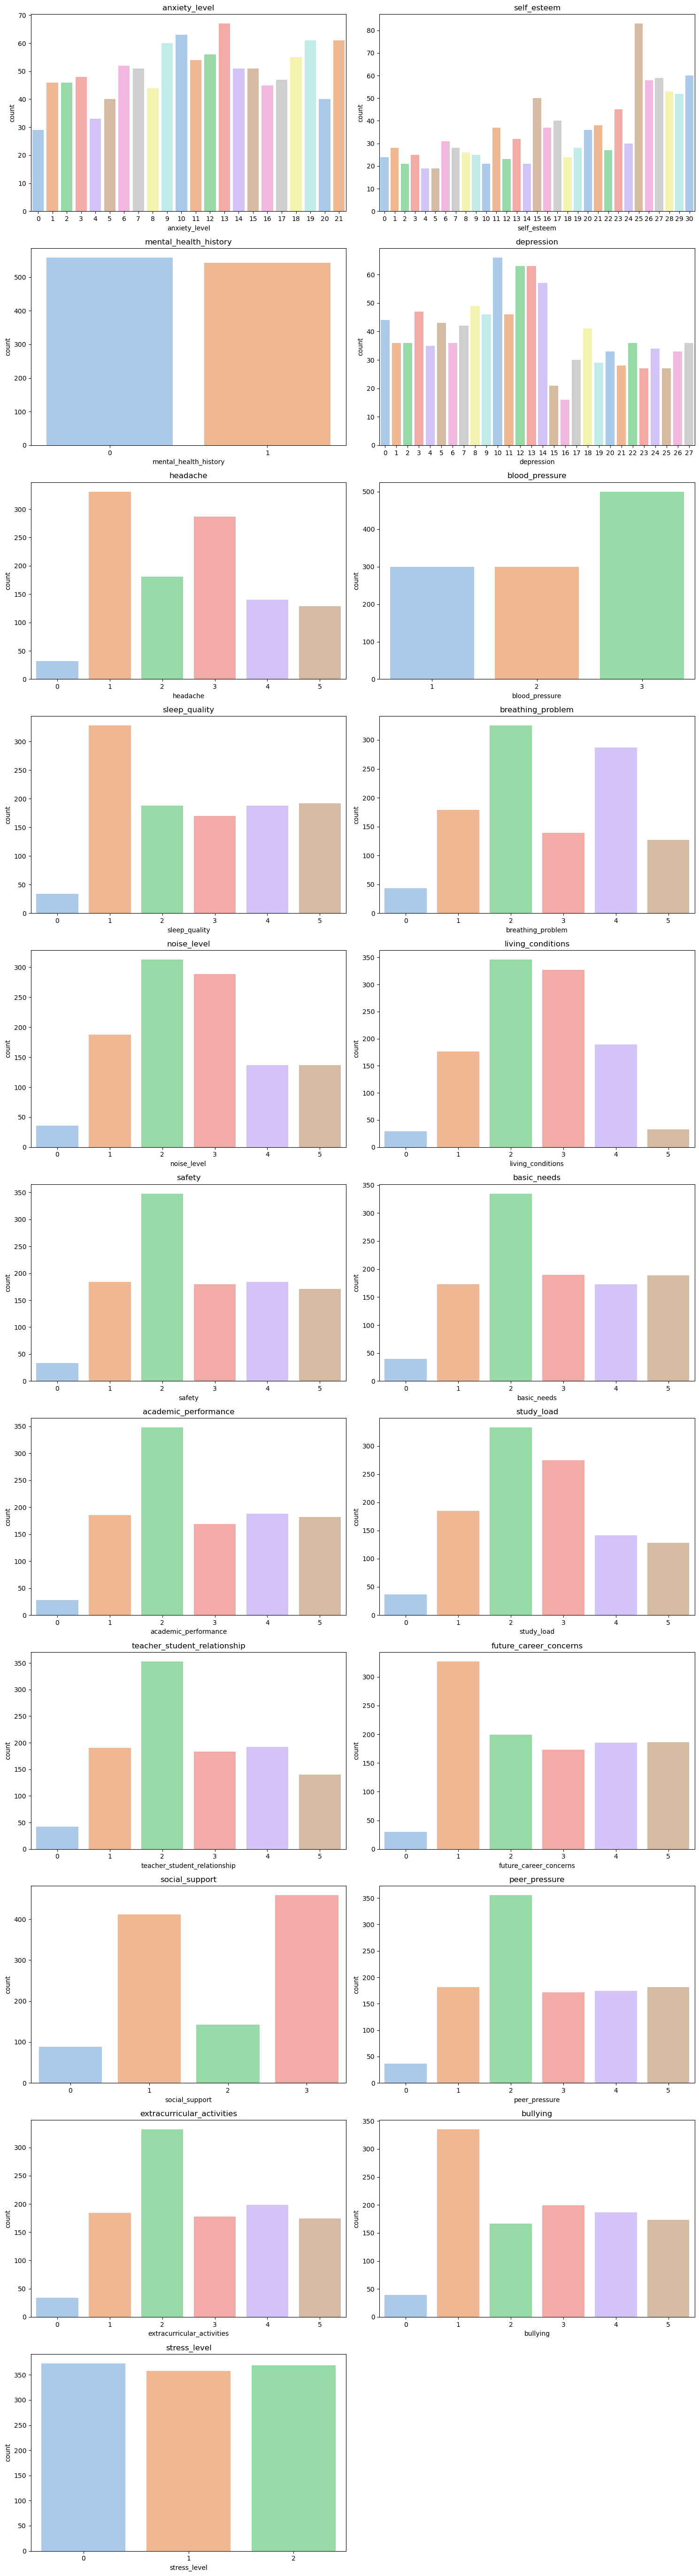

In [14]:
# Get the list of all columns in the DataFrame
all_columns = df.columns

# Define the number of rows and columns for subplot grid
num_rows = len(all_columns) // 2 + len(all_columns) % 2
num_cols = 2

# Create the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot bar plots for each variable
for i, column in enumerate(all_columns):
    sns.countplot(data=df, x=column, ax=axes[i], palette='pastel')
    axes[i].set_title(column)

# Remove empty subplots if there are fewer variables than subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

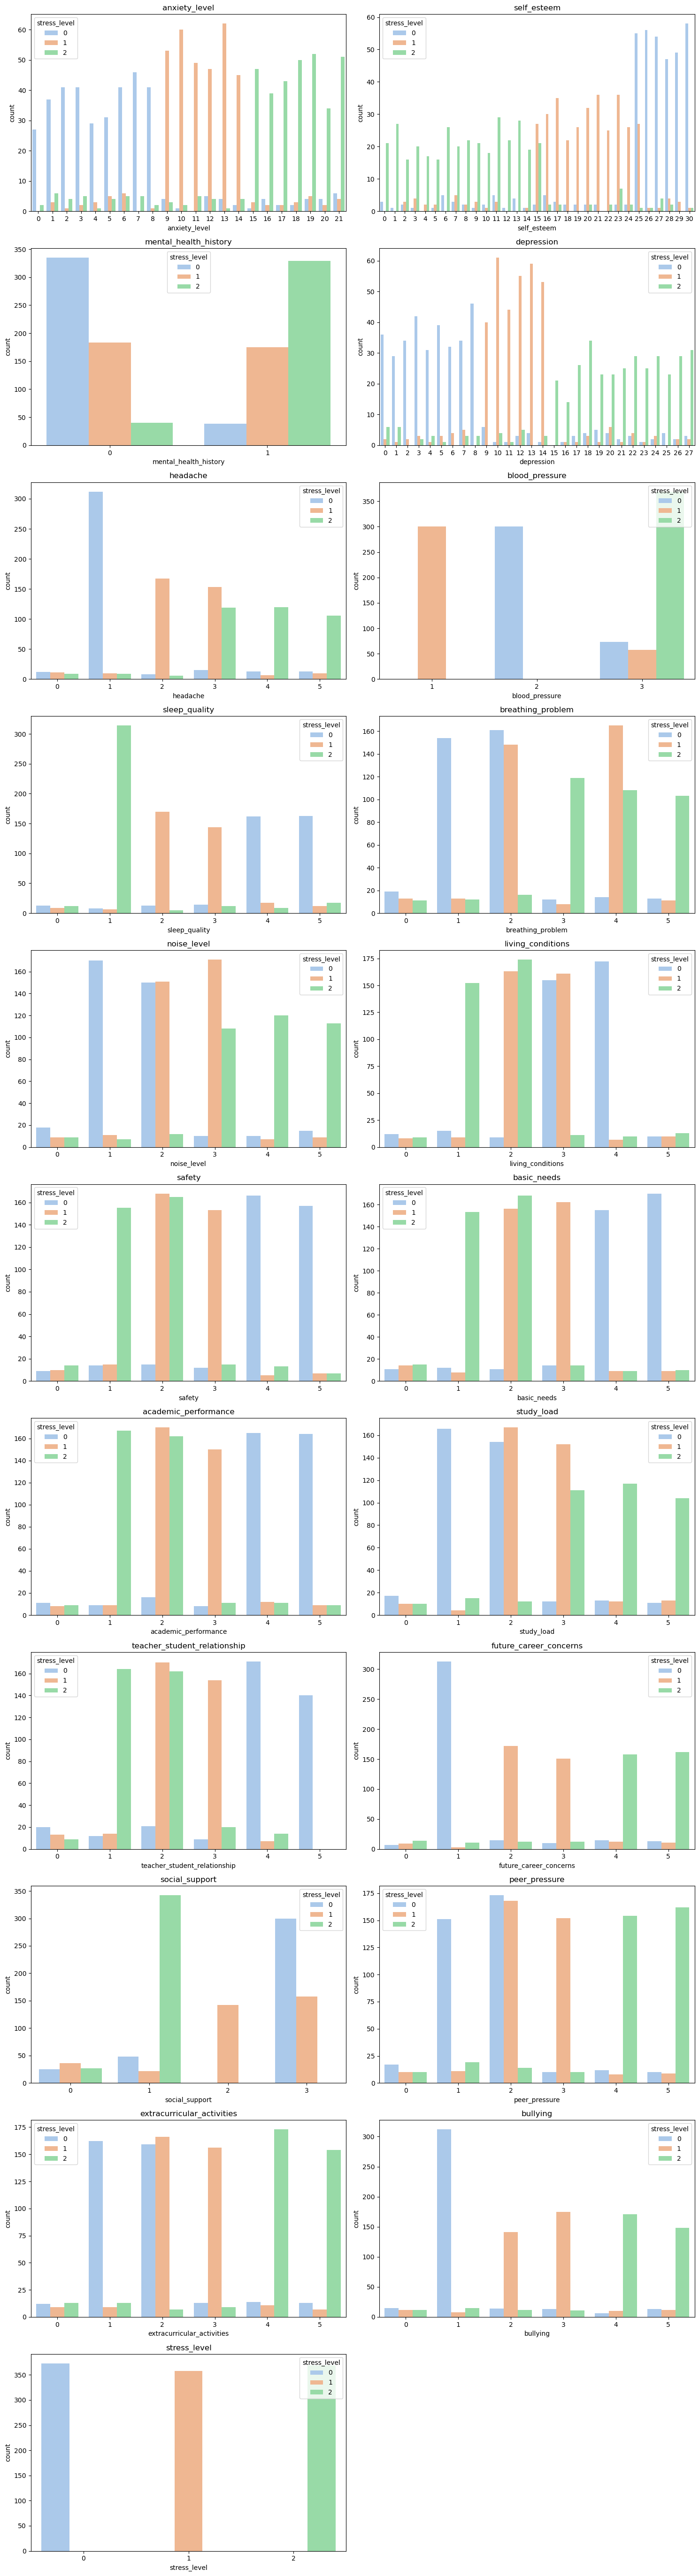

In [15]:
# Get the list of all columns in the DataFrame
all_columns = df.columns

# Define the number of rows and columns for subplot grid
num_rows = len(all_columns) // 2 + len(all_columns) % 2
num_cols = 2

# Create the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot bar plots for each variable
for i, column in enumerate(all_columns):
    sns.countplot(data=df, x=column, ax=axes[i], hue=df['stress_level'], palette='pastel')
    axes[i].set_title(column)

# Remove empty subplots if there are fewer variables than subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

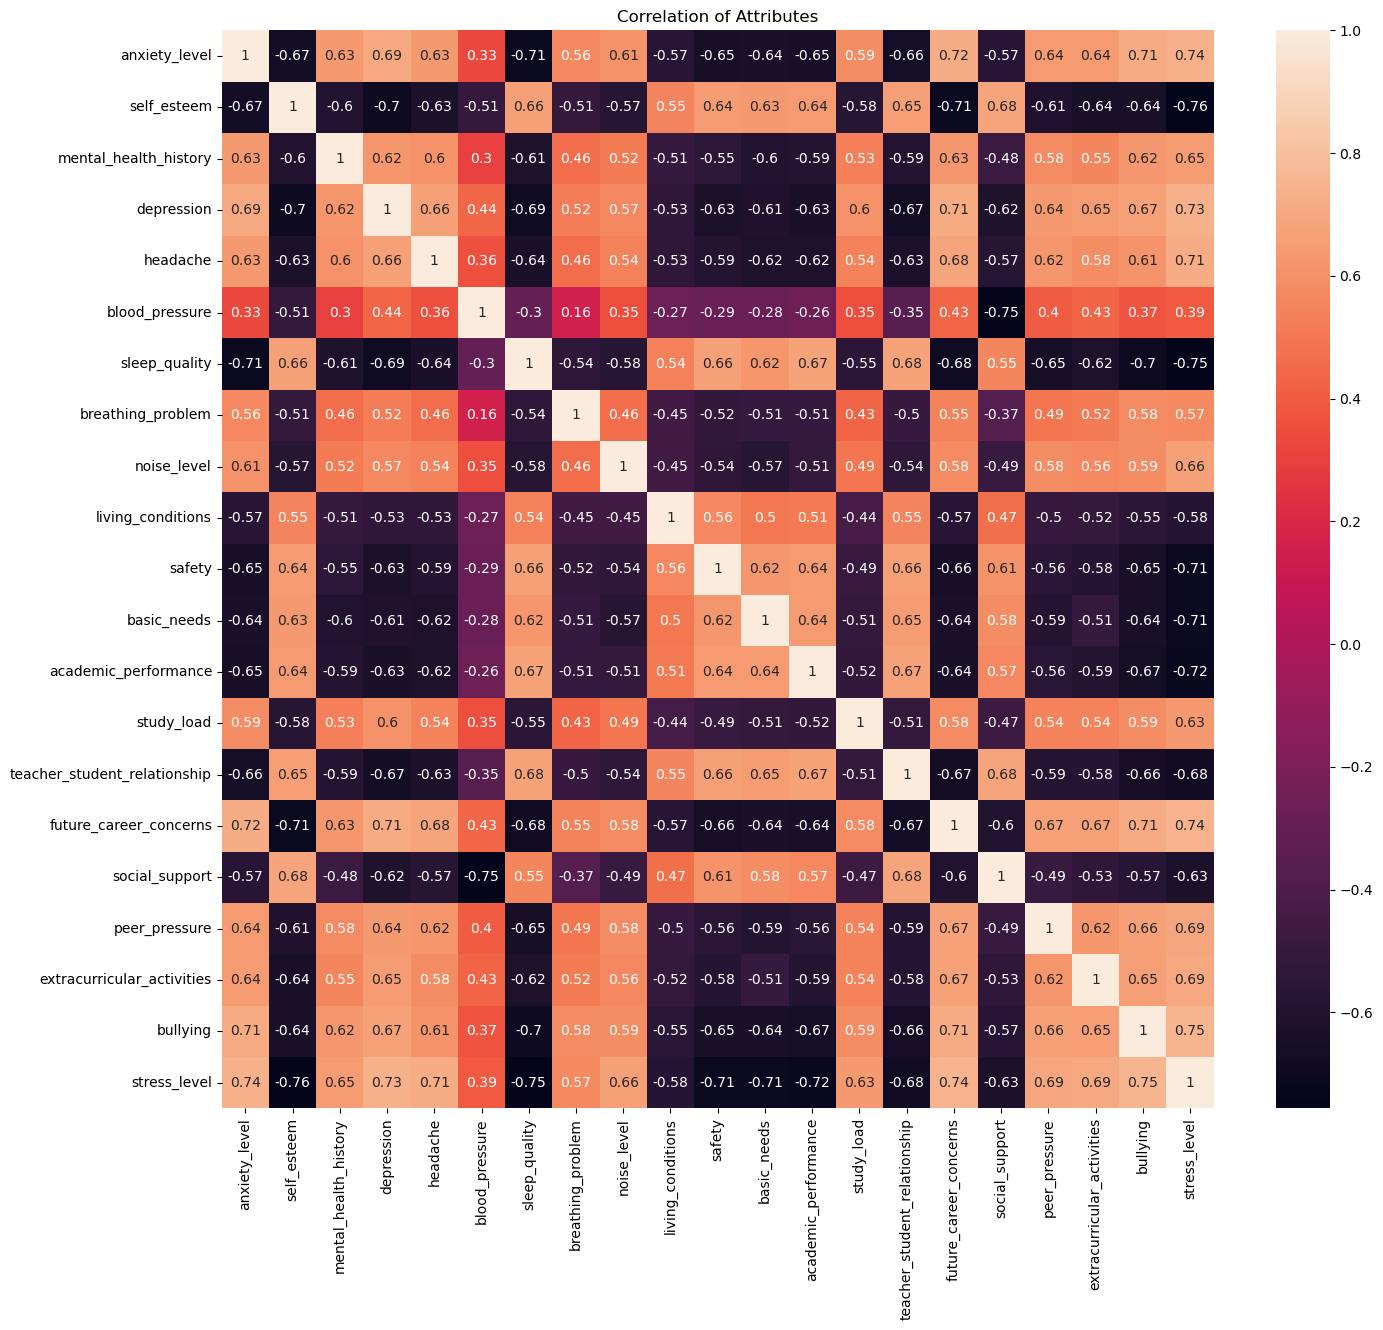

In [16]:
# Correlation
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation of Attributes')
plt.show()

### Psychological Factors

              precision    recall  f1-score   support

           0       0.92      0.86      0.88        76
           1       0.86      0.89      0.87        73
           2       0.85      0.87      0.86        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



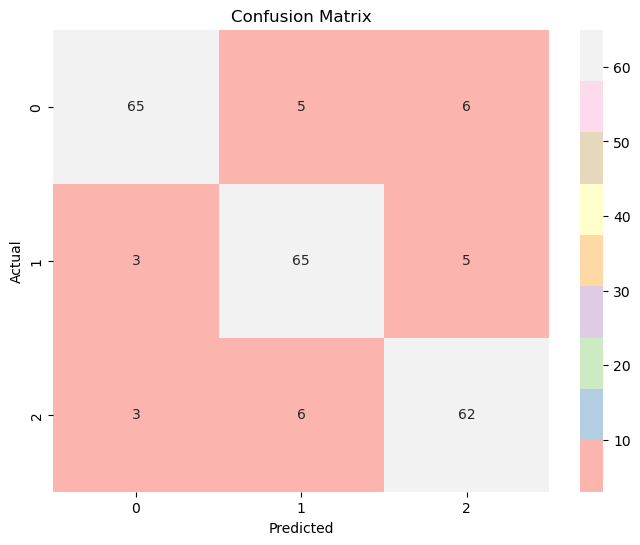

In [17]:
# Step 1: Split the data
X = psych.drop('stress_level', axis=1)
y = psych['stress_level']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a StandardScaler object
scaler = StandardScaler()

# Step 4: Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)
# Only transform the test data (do not fit again)
X_test = scaler.transform(X_test)

# Step 3: Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Train the Model
rf_classifier.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 6: Evaluate the Model
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Pastel1')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

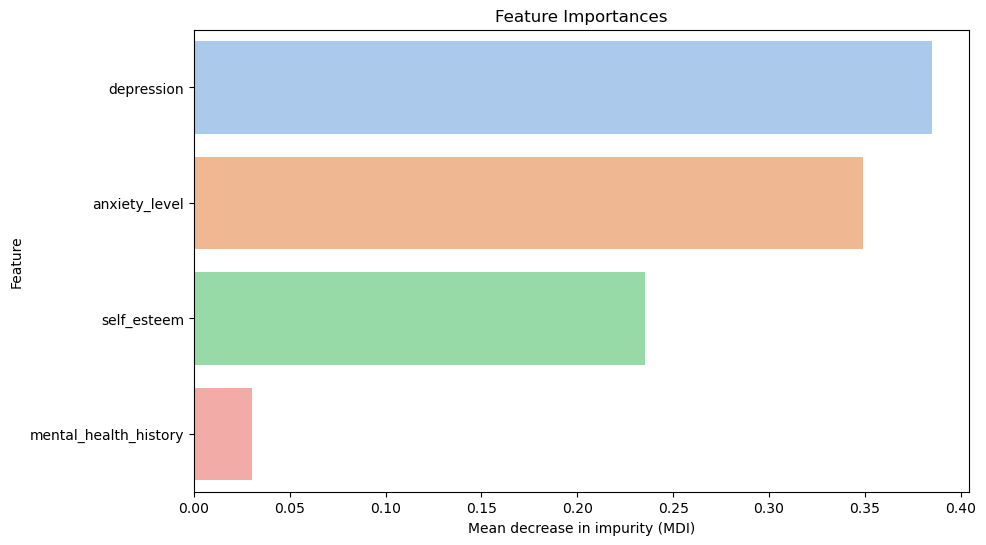

In [18]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='pastel')
plt.title('Feature Importances')
plt.xlabel('Mean decrease in impurity (MDI)')
plt.ylabel('Feature')
plt.show()

### Physiological Factors

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        76
           1       0.89      0.86      0.88        73
           2       0.87      0.83      0.85        71

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



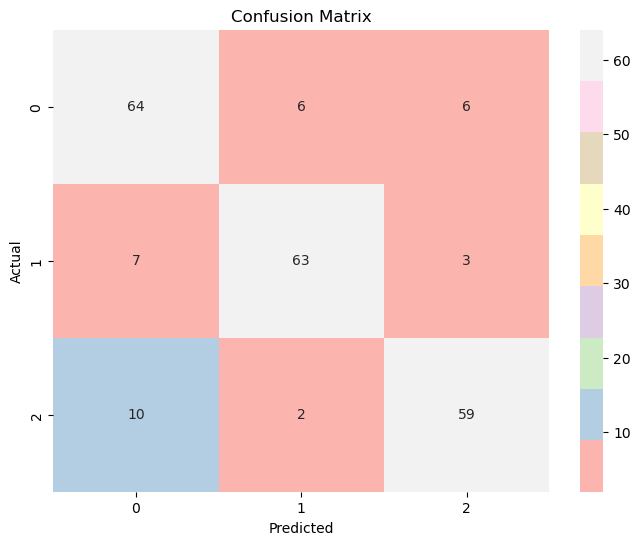

In [19]:
# Step 1: Split the data
X = phys.drop('stress_level', axis=1)
y = phys['stress_level']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a StandardScaler object
scaler = StandardScaler()

# Step 4: Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)
# Only transform the test data (do not fit again)
X_test = scaler.transform(X_test)

# Step 5: Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 6: Train the Model
rf_classifier.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 8: Evaluate the Model
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Pastel1')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

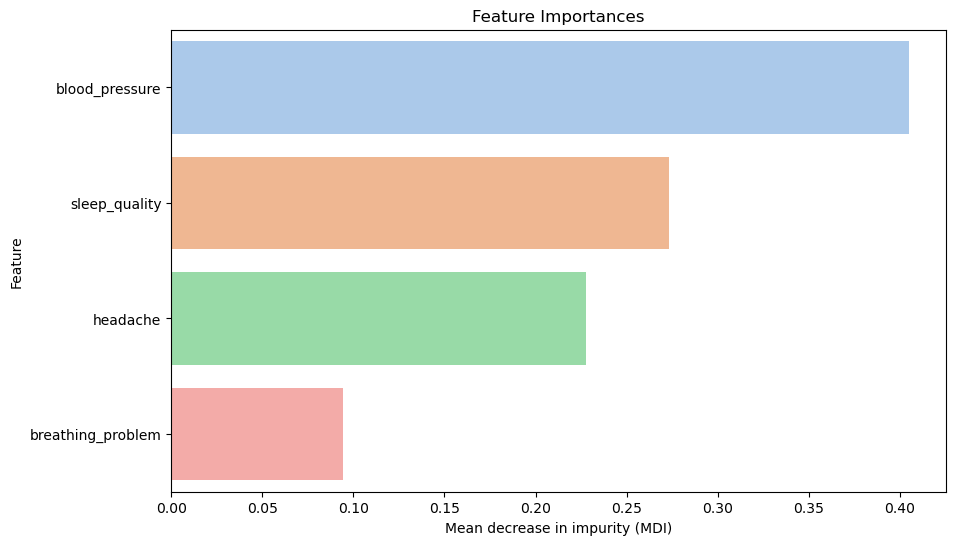

In [20]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='pastel')
plt.title('Feature Importances')
plt.xlabel('Mean decrease in impurity (MDI)')
plt.ylabel('Feature')
plt.show()

### Environmental Factors

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        76
           1       0.89      0.88      0.88        73
           2       0.87      0.83      0.85        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



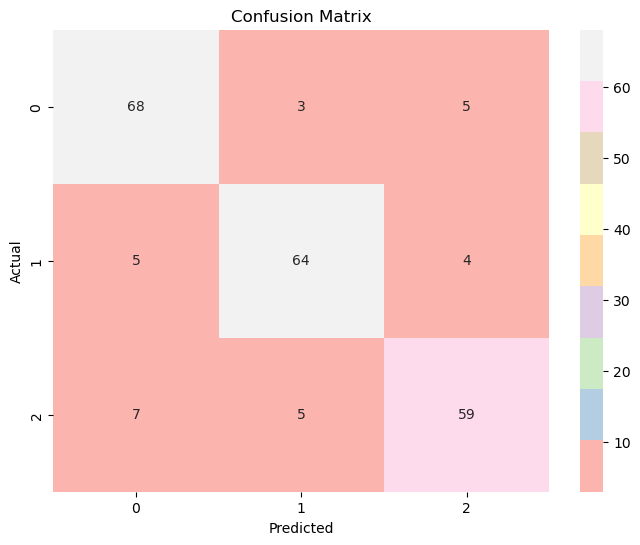

In [21]:
# Step 1: Split the data
X = env.drop('stress_level', axis=1)
y = env['stress_level']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a StandardScaler object
scaler = StandardScaler()

# Step 4: Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)
# Only transform the test data (do not fit again)
X_test = scaler.transform(X_test)

# Step 5: Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 6: Train the Model
rf_classifier.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 8: Evaluate the Model
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Pastel1')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

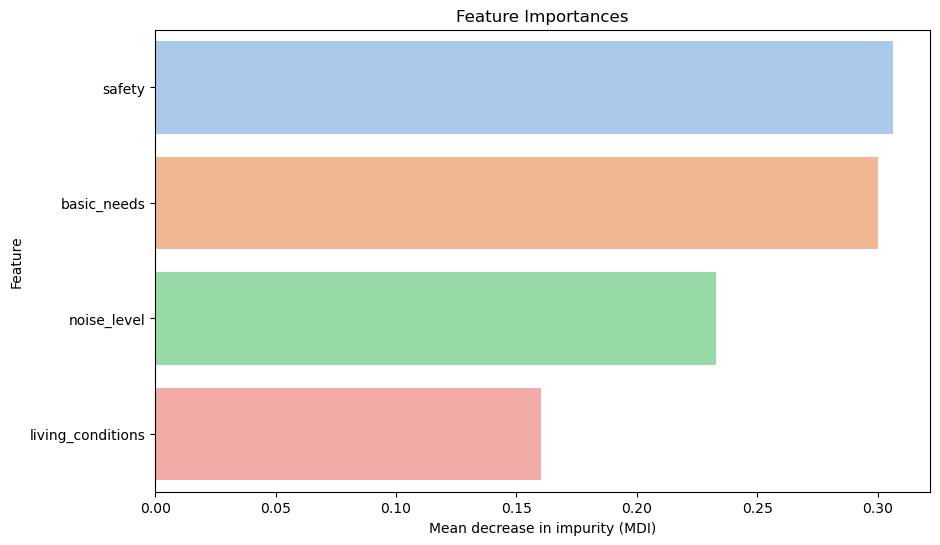

In [22]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='pastel')
plt.title('Feature Importances')
plt.xlabel('Mean decrease in impurity (MDI)')
plt.ylabel('Feature')
plt.show()

### Academic Factors

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        76
           1       0.89      0.89      0.89        73
           2       0.88      0.90      0.89        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



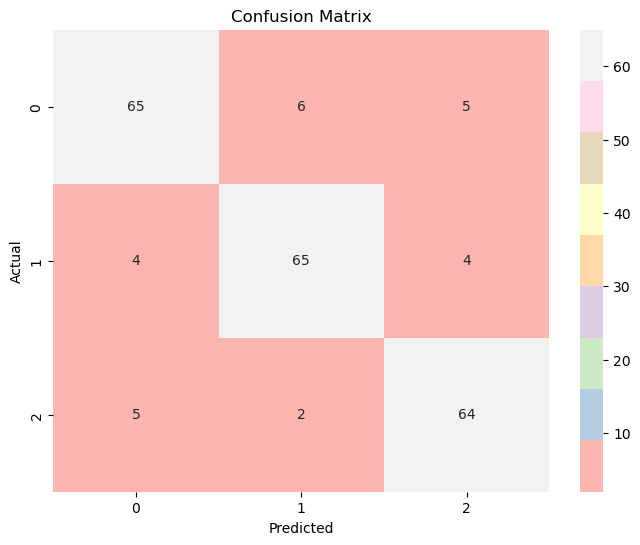

In [23]:
# Step 1: Split the data
X = acad.drop('stress_level', axis=1)
y = acad['stress_level']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a StandardScaler object
scaler = StandardScaler()

# Step 4: Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)
# Only transform the test data (do not fit again)
X_test = scaler.transform(X_test)

# Step 5: Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 6: Train the Model
rf_classifier.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 8: Evaluate the Model
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Pastel1')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

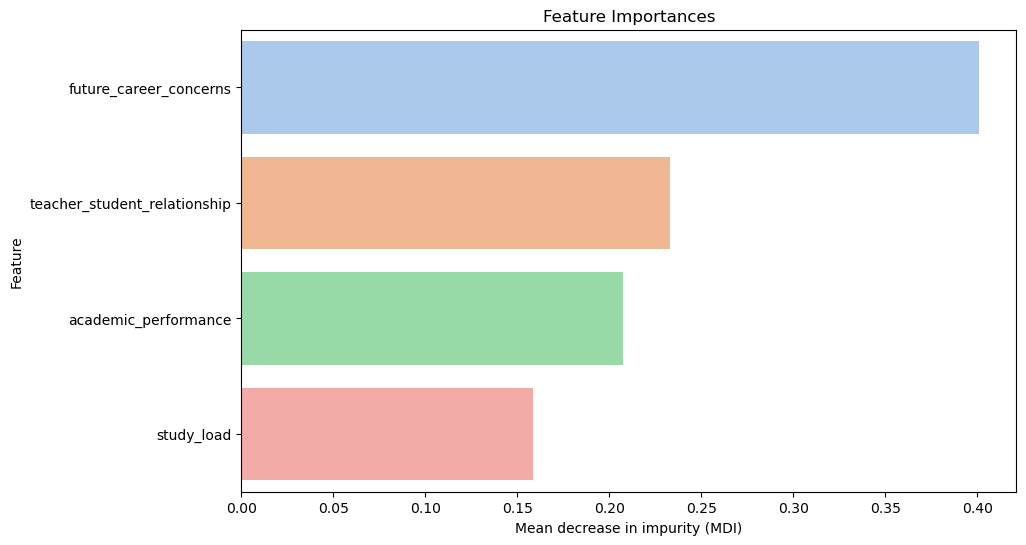

In [24]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='pastel')
plt.title('Feature Importances')
plt.xlabel('Mean decrease in impurity (MDI)')
plt.ylabel('Feature')
plt.show()

### Social Factors

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        76
           1       0.91      0.92      0.91        73
           2       0.85      0.89      0.87        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



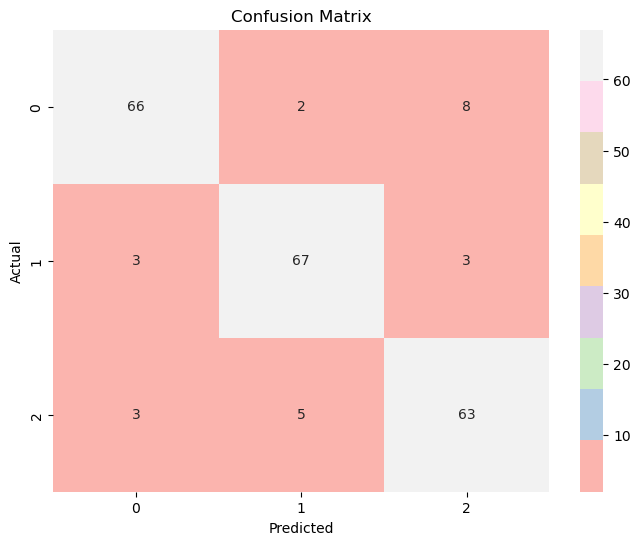

In [25]:
# Step 1: Split the data
X = soc.drop('stress_level', axis=1)
y = soc['stress_level']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a StandardScaler object
scaler = StandardScaler()

# Step 4: Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)
# Only transform the test data (do not fit again)
X_test = scaler.transform(X_test)

# Step 5: Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 6: Train the Model
rf_classifier.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 8: Evaluate the Model
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Pastel1')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

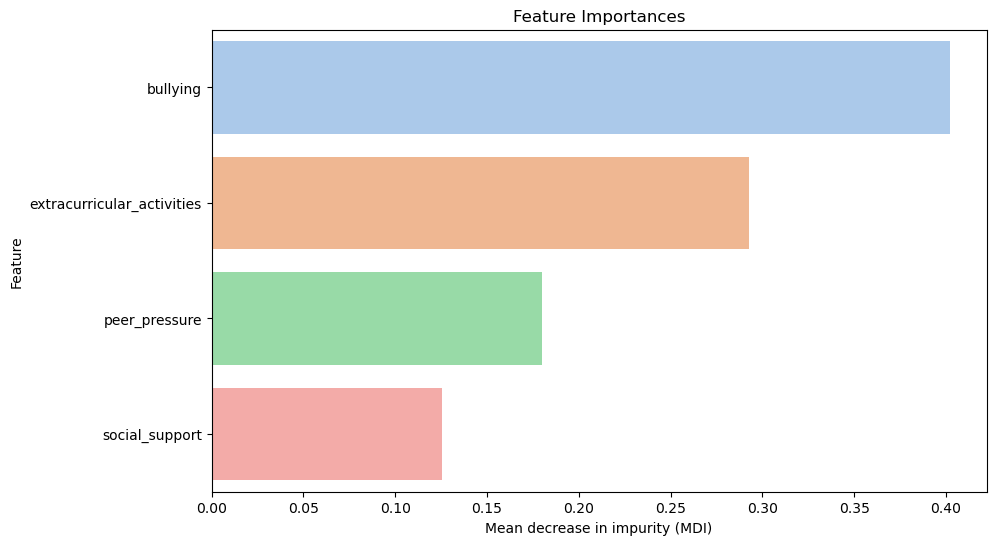

In [26]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='pastel')
plt.title('Feature Importances')
plt.xlabel('Mean decrease in impurity (MDI)')
plt.ylabel('Feature')
plt.show()

### Physiological Factors without Blood Pressure

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        76
           1       0.86      0.85      0.86        73
           2       0.88      0.83      0.86        71

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220



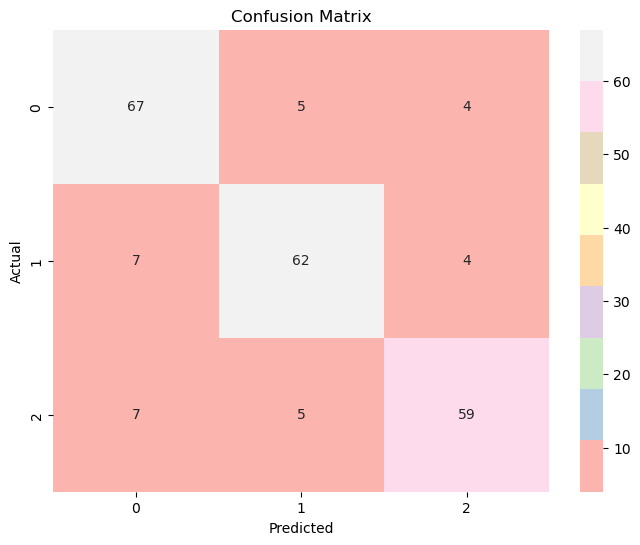

In [27]:
# Step 1: Split the data
phys = df[['headache', 'sleep_quality', 'breathing_problem', 'stress_level']]
X = phys.drop('stress_level', axis=1)
y = phys['stress_level']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a StandardScaler object
scaler = StandardScaler()

# Step 4: Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)
# Only transform the test data (do not fit again)
X_test = scaler.transform(X_test)

# Step 5: Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 6: Train the Model
rf_classifier.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 8: Evaluate the Model
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Pastel1')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

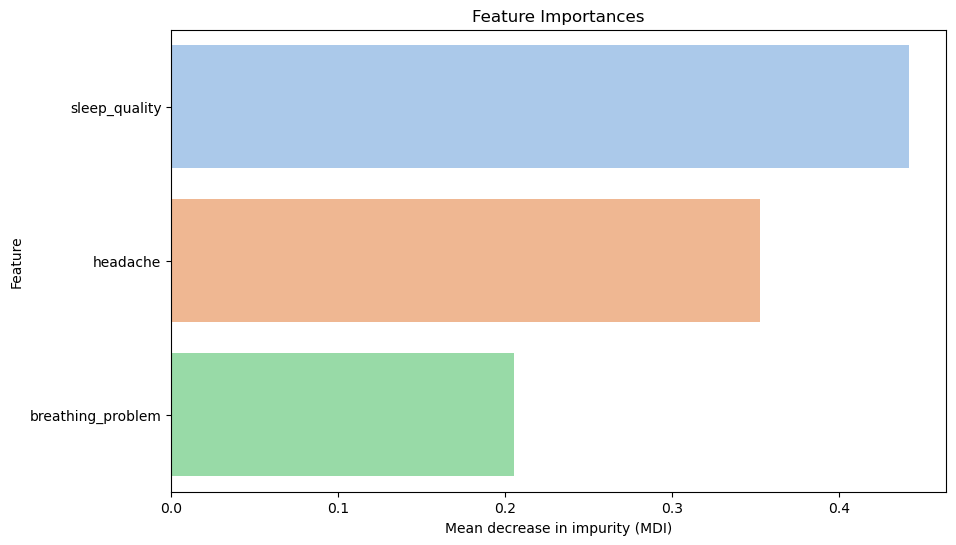

In [28]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='pastel')
plt.title('Feature Importances')
plt.xlabel('Mean decrease in impurity (MDI)')
plt.ylabel('Feature')
plt.show()

### All Factors with Blood Pressure

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        76
           1       0.90      0.86      0.88        73
           2       0.90      0.86      0.88        71

    accuracy                           0.87       220
   macro avg       0.88      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



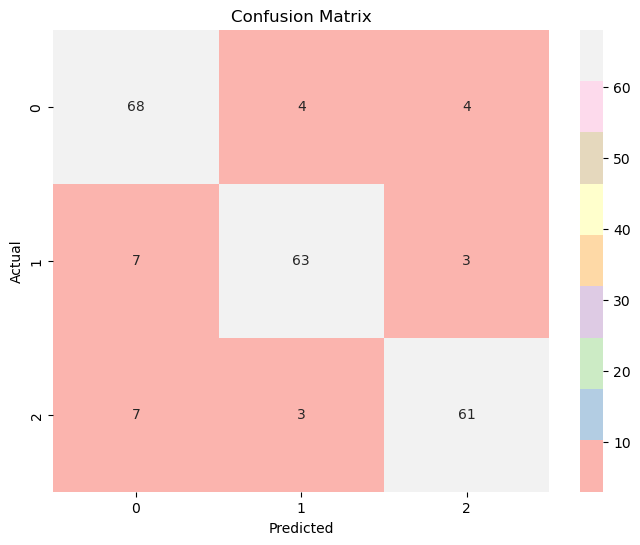

In [29]:
# Step 1: Split the data
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a StandardScaler object
scaler = StandardScaler()

# Step 4: Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)
# Only transform the test data (do not fit again)
X_test = scaler.transform(X_test)

# Step 5: Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 6: Train the Model
rf_classifier.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 8: Evaluate the Model
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Pastel1')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

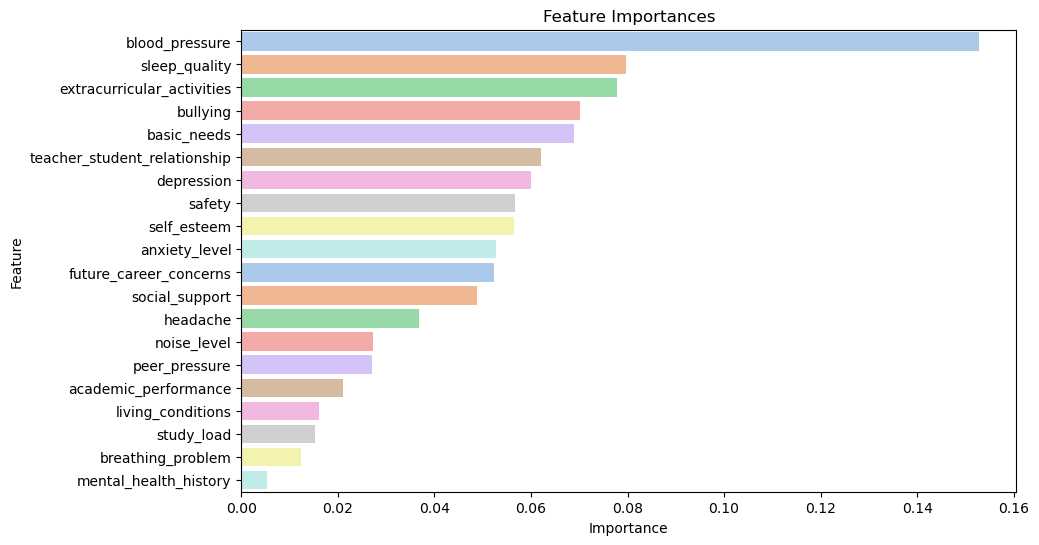

In [30]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='pastel')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### All Factors without Blood Pressure

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        76
           1       0.95      0.85      0.90        73
           2       0.86      0.87      0.87        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



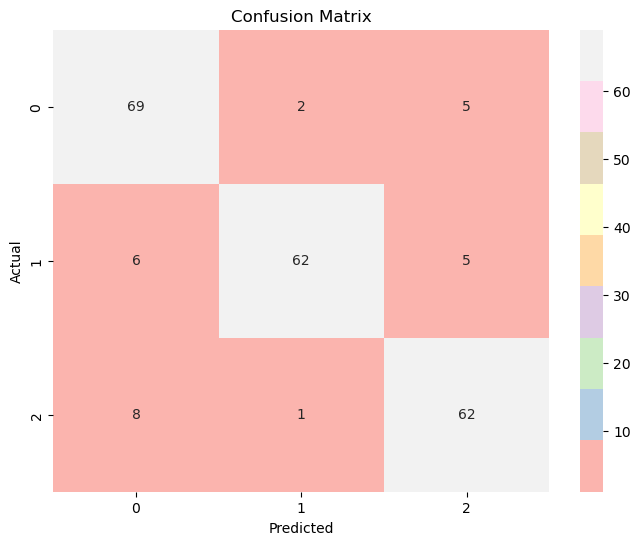

In [28]:
# Step 1: Split the data
df = df.drop('blood_pressure', axis=1)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a StandardScaler object
scaler = StandardScaler()

# Step 4: Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)
# Only transform the test data (do not fit again)
X_test = scaler.transform(X_test)

# Step 5: Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 6: Train the Model
rf_classifier.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 8: Evaluate the Model
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Pastel1')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

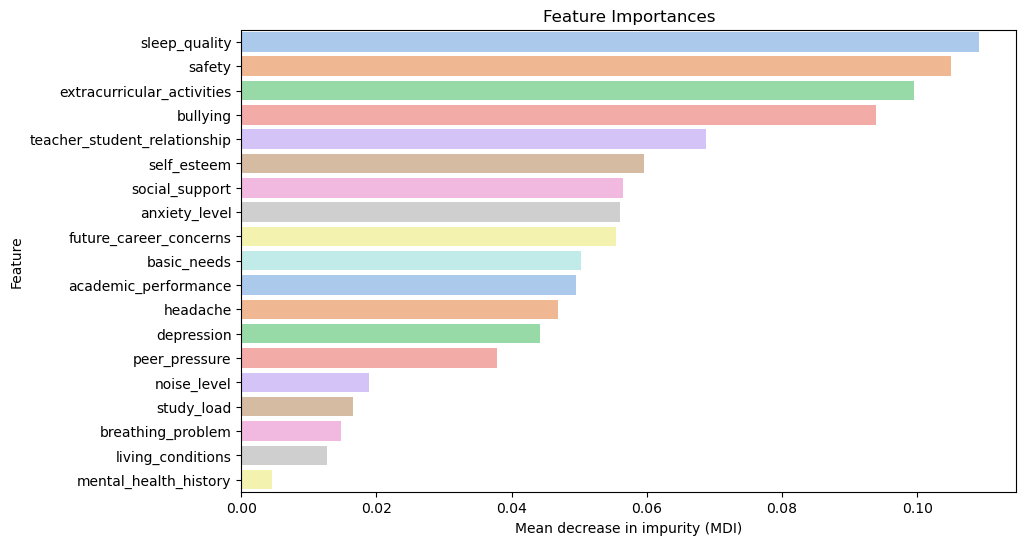

In [29]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='pastel')
plt.title('Feature Importances')
plt.xlabel('Mean decrease in impurity (MDI)')
plt.ylabel('Feature')
plt.show()

### Data Explanation:
### Anxiety : range from 0 to 21, Measure : GAD-7
#### 0–4: minimal anxiety
#### 5–9: mild anxiety
#### 10–14: moderate anxiety
#### 15–21: severe anxiety 
##### https://adaa.org/sites/default/files/GAD-7_Anxiety-updated_0.pdf
### Self-esteem : range 0 to 30, Measure: Rosenberg Self Esteem Scale
#### 15-25 are within normal range; scores below 15 suggest low self-esteem; over 25 high self-esteem
##### https://www.sralab.org/rehabilitation-measures/rosenberg-self-esteem-scale#:~:text=The%20RSES%20is%20commonly%20scored,strongly%20agree%20to%20strongly%20disagree.&text=The%20scale%20ranges%20from%200,Other%20scoring%20options%20are%20possible. 
### Mental Health History : 0 if no mental health history, 1 if mental health history
### Depression : range 0 to 27, Measure: Patient Health Questionnaire (PHQ-9)
#### 0 suggests no depression
#### 1-4 suggests minimal depression
#### 5-9 suggests mild depression
#### 10-14 suggests moderate depression
#### 15-19 suggests moderately severe depression
#### 20-27 suggests severe depression
##### https://med.stanford.edu/fastlab/research/imapp/msrs/_jcr_content/main/accordion/accordion_content3/download_256324296/file.res/PHQ9%20id%20date%2008.03.pdf
### Blood pressure: range 1 to 3 (1 is low, 2 is normal, 3 is high. 1 and 3 are bad/unhealthy)
### Living Conditions: material aspects of living conditions, Measure: Living Conditions Rating Scale (LCRS)
#### 0-1 suggest poor living conditions
#### 2-3 suggest good living conditions
#### 4-5 suggest very good living conditions
### Stress level: range 0 to 2 (0 low level/absent, 1 medium level, 2 high level)
### Other features mostly range from 0 to 5 considering 0,1 to be low, 2,3 to be mid, and 4,5 to be high.
#### *depending on the variable, a higher score or a lower score could be worse and thus a cause of stress.

In [32]:
def stressed():
    # Take user input for stress level
    stress_level = int(input("Enter your stress level (0-2): "))

    stress = ""

    # Check if stress level exceeds normal range
    if stress_level > 0:
        stress+="Your stress level is higher than normal. Let's find out what is stressing you out."

    return stress

# Output message
stressed()

Enter your stress level (0-2): 1


"Your stress level is higher than normal. Let's find out what is stressing you out."

In [33]:
def recommend_resources():
    # Take user input for psychological factors
    anxiety_level = int(input("Enter your anxiety level (0-21): "))
    self_esteem = int(input("Enter your self-esteem score (0-30): "))
    mental_health_history = int(input("Do you have a mental health history? (0 for no, 1 for yes): "))
    depression = int(input("Enter your depression score (0-27): "))

    recommendations = []

    # Check if any of the psychological factors exceed normal ranges
    if anxiety_level > 10:
        recommendations.append("Your anxiety level is higher than normal. Consider seeking professional counseling services or practicing relaxation techniques.")
    if self_esteem < 15:
        recommendations.append("Your self-esteem score is lower than normal. Engage in activities that boost self-confidence and consider talking to a therapist or counselor.")
    if depression > 5:
        recommendations.append("Your depression score is higher than normal. Reach out to a mental health professional for support and consider therapy or support groups.")

    return recommendations

# Get recommendations based on user input
recommended_resources = recommend_resources()

# Print recommendations and links to resources
if recommended_resources:
    print("Recommended resources:")
    for resource in recommended_resources:
        print("-", resource)
    print("Links to resources:")
    print("- Mental Health Counseling Services: https://example.com/counseling")
    print("- Relaxation Techniques: https://example.com/relaxation")
    print("- Support Groups: https://example.com/support-groups")
else:
    print("No recommendations provided.")

Enter your anxiety level (0-21): 11
Enter your self-esteem score (0-30): 6
Do you have a mental health history? (0 for no, 1 for yes): 0
Enter your depression score (0-27): 17
Recommended resources:
- Your anxiety level is higher than normal. Consider seeking professional counseling services or practicing relaxation techniques.
- Your self-esteem score is lower than normal. Engage in activities that boost self-confidence and consider talking to a therapist or counselor.
- Your depression score is higher than normal. Reach out to a mental health professional for support and consider therapy or support groups.
Links to resources:
- Mental Health Counseling Services: https://example.com/counseling
- Relaxation Techniques: https://example.com/relaxation
- Support Groups: https://example.com/support-groups


In [34]:
def recommend_resources():
    # Take user input for physiological factors
    headache = int(input("Enter your headache score (0-5): "))
    blood_pressure = int(input("Enter your blood pressure (1=low, 2=normal, 3=high): "))
    sleep_quality = int(input("Enter your sleep quality score (0-5): "))
    breathing_problem = int(input("Do you have any breathing problems? (0 for no, 1 for yes): "))

    recommendations = []

    # Check if any of the physiological factors exceed normal ranges
    if headache > 1:
        recommendations.append("Your headache score is higher than normal. Consider monitoring your hydration, stress levels, and seeking medical advice if persistent.")
    if blood_pressure in [1, 3]:
        recommendations.append("Your blood pressure is outside the normal range. Monitor your blood pressure regularly and consult with a healthcare professional.")
    if sleep_quality < 4:
        recommendations.append("Your sleep quality is lower than normal. Establish a regular sleep schedule, create a relaxing bedtime routine, and consider seeking advice from a sleep specialist.")
    if breathing_problem > 0:
        recommendations.append("You are experiencing breathing problems. Consult with a healthcare professional for evaluation and treatment options.")

    return recommendations

# Get recommendations based on user input
recommended_resources = recommend_resources()

# Print recommendations and links to resources
if recommended_resources:
    print("Recommended resources:")
    for resource in recommended_resources:
        print("-", resource)
    print("Links to resources:")
    print("- Headache Relief Techniques: https://example.com/headache-relief")
    print("- Blood Pressure Management Tips: https://example.com/blood-pressure-management")
    print("- Sleep Improvement Strategies: https://example.com/sleep-improvement")
    print("- Breathing Exercises: https://example.com/breathing-exercises")
else:
    print("No recommendations provided.")


Enter your headache score (0-5): 2
Enter your blood pressure (1=low, 2=normal, 3=high): 1
Enter your sleep quality score (0-5): 3
Do you have any breathing problems? (0 for no, 1 for yes): 1
Recommended resources:
- Your headache score is higher than normal. Consider monitoring your hydration, stress levels, and seeking medical advice if persistent.
- Your blood pressure is outside the normal range. Monitor your blood pressure regularly and consult with a healthcare professional.
- Your sleep quality is lower than normal. Establish a regular sleep schedule, create a relaxing bedtime routine, and consider seeking advice from a sleep specialist.
- You are experiencing breathing problems. Consult with a healthcare professional for evaluation and treatment options.
Links to resources:
- Headache Relief Techniques: https://example.com/headache-relief
- Blood Pressure Management Tips: https://example.com/blood-pressure-management
- Sleep Improvement Strategies: https://example.com/sleep-impr

In [35]:
def recommend_resources():
    # Take user input for environmental factors
    noise_level = int(input("Enter the noise level in your environment (0-5): "))
    living_conditions = int(input("Rate your living conditions (0-5): "))
    safety = int(input("Rate your safety level (0-5): "))
    basic_needs = int(input("Rate your access to basic needs (0-5): "))

    recommendations = []

    # Check if any of the environmental factors exceed normal ranges
    if noise_level > 1:
        recommendations.append("The noise level in your environment is higher than normal. Consider using earplugs or noise-canceling headphones to reduce exposure.")
    if living_conditions < 3:
        recommendations.append("Your living conditions are below the normal range. Take steps to improve your living environment, such as cleaning, organizing, or seeking better housing options.")
    if safety < 4:
        recommendations.append("Your safety level is below the normal range. Prioritize your safety by avoiding risky situations, staying aware of your surroundings, and seeking help if needed.")
    if basic_needs < 4:
        recommendations.append("Your access to basic needs is below the normal range. Seek assistance from community resources, food banks, or support organizations to address essential needs.")

    return recommendations

# Get recommendations based on user input
recommended_resources = recommend_resources()

# Print recommendations and links to resources
if recommended_resources:
    print("Recommended resources:")
    for resource in recommended_resources:
        print("-", resource)
    print("Links to resources:")
    print("- Noise Reduction Tips: https://example.com/noise-reduction")
    print("- Living Environment Improvement Ideas: https://example.com/living-environment")
    print("- Safety Precautions: https://example.com/safety-precautions")
    print("- Basic Needs Assistance: https://example.com/basic-needs-support")
else:
    print("No recommendations provided.")


Enter the noise level in your environment (0-5): 2
Rate your living conditions (0-5): 2
Rate your safety level (0-5): 2
Rate your access to basic needs (0-5): 2
Recommended resources:
- The noise level in your environment is higher than normal. Consider using earplugs or noise-canceling headphones to reduce exposure.
- Your living conditions are below the normal range. Take steps to improve your living environment, such as cleaning, organizing, or seeking better housing options.
- Your safety level is below the normal range. Prioritize your safety by avoiding risky situations, staying aware of your surroundings, and seeking help if needed.
- Your access to basic needs is below the normal range. Seek assistance from community resources, food banks, or support organizations to address essential needs.
Links to resources:
- Noise Reduction Tips: https://example.com/noise-reduction
- Living Environment Improvement Ideas: https://example.com/living-environment
- Safety Precautions: https://

In [36]:
def recommend_resources():
    # Take user input for academic factors
    academic_performance = int(input("Rate your academic performance (0-5): "))
    study_load = int(input("Rate your study load (0-5): "))
    teacher_student_relationship = int(input("Rate your relationship with your teacher (0-5): "))
    future_career_concerns = int(input("Rate your future career concerns (0-5): "))

    recommendations = []

    # Check if any of the academic factors exceed normal ranges
    if academic_performance < 3:
        recommendations.append("Your academic performance is below the normal range. Consider seeking tutoring, academic support services, or adjusting your study habits.")
    if study_load > 3:
        recommendations.append("Your study load is higher than normal. Prioritize tasks, practice time management, and consider delegating tasks if possible.")
    if teacher_student_relationship < 3:
        recommendations.append("Your relationship with your teacher is below the normal range. Communicate with your teacher, seek clarification or additional support, and consider reaching out to school counselors or advisors.")
    if future_career_concerns > 3:
        recommendations.append("Your future career concerns are higher than normal. Explore career counseling services, networking opportunities, and career development resources.")

    return recommendations

# Get recommendations based on user input
recommended_resources = recommend_resources()

# Print recommendations and links to resources
if recommended_resources:
    print("Recommended resources:")
    for resource in recommended_resources:
        print("-", resource)
    print("Links to resources:")
    print("- Tutoring Center: https://example.com/noise-reduction")
    print("- Career Center: https://example.com/living-environment")
    print("- Safety Precautions: https://example.com/safety-precautions")
    print("- Career Center: https://example.com/basic-needs-support")
else:
    print("No recommendations provided.")


Rate your academic performance (0-5): 1
Rate your study load (0-5): 4
Rate your relationship with your teacher (0-5): 0
Rate your future career concerns (0-5): 5
Recommended resources:
- Your academic performance is below the normal range. Consider seeking tutoring, academic support services, or adjusting your study habits.
- Your study load is higher than normal. Prioritize tasks, practice time management, and consider delegating tasks if possible.
- Your relationship with your teacher is below the normal range. Communicate with your teacher, seek clarification or additional support, and consider reaching out to school counselors or advisors.
- Your future career concerns are higher than normal. Explore career counseling services, networking opportunities, and career development resources.
Links to resources:
- Tutoring Center: https://example.com/noise-reduction
- Career Center: https://example.com/living-environment
- Safety Precautions: https://example.com/safety-precautions
- Care

In [37]:
def recommend_resources():
    # Take user input for social factors
    social_support = int(input("Rate your social support level (0-5): "))
    peer_pressure = int(input("Rate your experience of peer pressure (0-5): "))
    bullying = int(input("Rate your experience of bullying (0-5): "))

    recommendations = []

    # Check if any of the social factors exceed normal ranges
    if social_support < 3:
        recommendations.append("Your social support level is below the normal range. Reach out to friends, family, or support groups for emotional support and connection.")
    if peer_pressure > 1:
        recommendations.append("You are experiencing peer pressure above the normal range. Practice assertiveness, set boundaries, and seek guidance from trusted individuals or counselors.")
    if bullying > 1:
        recommendations.append("Your experience of bullying is above the normal range. Seek support from trusted adults, school counselors, or anti-bullying organizations.")

    return recommendations

# Get recommendations based on user input
recommended_resources = recommend_resources()

# Print recommendations and links to resources
if recommended_resources:
    print("Recommended resources:")
    for resource in recommended_resources:
        print("-", resource)
    print("Links to resources:")
    print("- Tutoring Center: https://example.com/noise-reduction")
    print("- Career Center: https://example.com/living-environment")
    print("- Safety Precautions: https://example.com/safety-precautions")
    print("- Career Center: https://example.com/basic-needs-support")
else:
    print("No recommendations provided.")


Rate your social support level (0-5): 2
Rate your experience of peer pressure (0-5): 3
Rate your experience of bullying (0-5): 3
Recommended resources:
- Your social support level is below the normal range. Reach out to friends, family, or support groups for emotional support and connection.
- You are experiencing peer pressure above the normal range. Practice assertiveness, set boundaries, and seek guidance from trusted individuals or counselors.
- Your experience of bullying is above the normal range. Seek support from trusted adults, school counselors, or anti-bullying organizations.
Links to resources:
- Tutoring Center: https://example.com/noise-reduction
- Career Center: https://example.com/living-environment
- Safety Precautions: https://example.com/safety-precautions
- Career Center: https://example.com/basic-needs-support
